In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import names

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# .map('{:,.2f}'.format) - - - for big numbers

In [2]:
credit_risk_df = pd.read_csv('/Users/jakemeissner/Documents/datasets/german_credit_data.csv')
credit_risk_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
credit_risk_df = credit_risk_df.drop('Unnamed: 0', axis=1)
credit_risk_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


<AxesSubplot:ylabel='Frequency'>

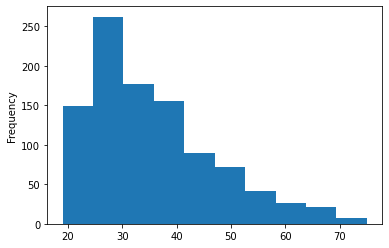

In [4]:
credit_risk_df['Age'].plot(kind='hist')

Text(0, 0.5, 'Frequency')

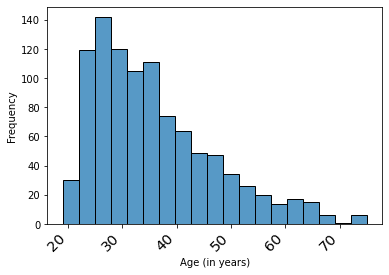

In [5]:
plt.figure(figsize=(6,4))

sns.histplot(x = credit_risk_df['Age'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Age (in years)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

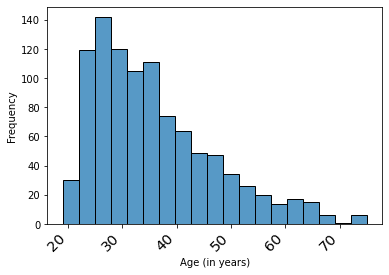

In [6]:
plt.figure(figsize=(6,4))

sns.histplot(x = credit_risk_df['Age'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Age (in years)')
plt.ylabel('Frequency')

<AxesSubplot:>

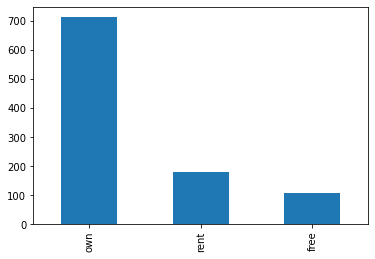

In [7]:
credit_risk_df['Housing'].value_counts().plot(kind='bar')

In [8]:
credit_risk_df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [9]:
credit_risk_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [10]:
credit_risk_df['Risk'] = False
credit_risk_df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,False
1,22,female,2,own,little,moderate,5951,48,radio/TV,False
2,49,male,1,own,little,NaN,2096,12,education,False
3,45,male,2,free,little,little,7882,42,furniture/equipment,False
4,53,male,2,free,little,little,4870,24,car,False
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,False
996,40,male,3,own,little,little,3857,30,car,False
997,38,male,2,own,little,NaN,804,12,radio/TV,False
998,23,male,2,free,little,little,1845,45,radio/TV,False


In [11]:
credit_risk_df.corr()

,Age,Job,Credit amount,Duration,Risk
Age,1.000000,0.015673,0.032716,-0.036136,NaN
Job,0.015673,1.000000,0.285385,0.210910,NaN
Credit amount,0.032716,0.285385,1.000000,0.624984,NaN
Duration,-0.036136,0.210910,0.624984,1.000000,NaN
Risk,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Credit Amount ($)')

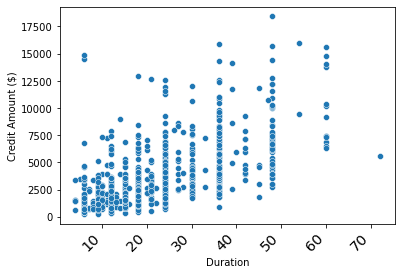

In [12]:
plt.figure(figsize=(6,4))

sns.scatterplot(x = credit_risk_df['Duration'], y = credit_risk_df['Credit amount'], data=credit_risk_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Duration')
plt.ylabel('Credit Amount ($)')

Text(0, 0.5, 'Frequency')

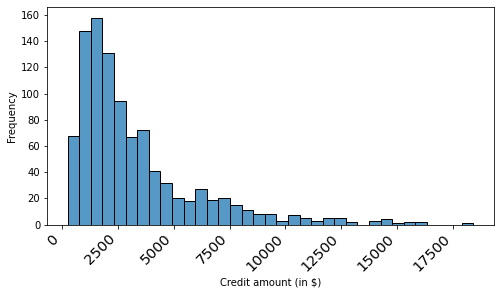

In [13]:
plt.figure(figsize=(8,4))

sns.histplot(x=credit_risk_df['Credit amount'], data=credit_risk_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Credit amount (in $)')
plt.ylabel('Frequency')

In [14]:
# IS INDIVIDUAL WORTHY OF LOAN

for i in range(len(credit_risk_df)):
    if credit_risk_df.iloc[i, 2] == 0:     # if individual has no job
        credit_risk_df.iloc[i, 9] = 1
    elif credit_risk_df.iloc[i, 2] == 1:     # if individual has 1 job
        if credit_risk_df.iloc[i, 4] == ('nan' or 'little') and credit_risk_df.iloc[i, 5] == ('nan' or 'little'):
            credit_risk_df[i, 9] = 1
        elif credit_risk_df.iloc[i, 4] == ('nan' or 'little') and credit_risk_df.iloc[i, 5] == ('moderate' or 'quite rich' or 'rich') and credit_risk_df.iloc[i, 8] == ('education' or 'business'):
            credit_risk_df.iloc[i, 9] = 0
        elif credit_risk_df.iloc[i, 4] == ('moderate' or 'quite rich' or 'rich') and credit_risk_df.iloc[i, 8] == ('education' or 'business'):
            credit_risk_df.iloc[i, 9] = 0
        else:
            credit_risk_df.iloc[i, 9] = 1
    else:     # if individual has 2 jobs
        credit_risk_df.iloc[i, 9] = 0   

In [15]:
credit_risk_df[credit_risk_df['Risk'] == 1][:10]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,49,male,1,own,little,NaN,2096,12,education,1
5,35,male,1,free,NaN,NaN,9055,36,education,1
8,61,male,1,own,rich,NaN,3059,12,radio/TV,1
13,60,male,1,own,little,little,1199,24,car,1
15,32,female,1,own,moderate,little,1282,24,radio/TV,1
22,48,male,1,rent,little,little,2241,10,car,1
25,36,male,1,own,little,little,1374,6,furniture/equipment,1
26,39,male,1,own,little,NaN,426,6,radio/TV,1
33,57,male,1,rent,NaN,NaN,1264,12,business,1
35,25,male,1,own,little,moderate,4746,45,radio/TV,1


In [16]:
credit_risk_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,0


Text(0, 0.5, 'Count')

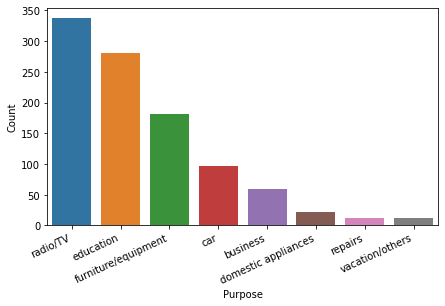

In [17]:
plt.figure(figsize=(7, 4))
sns.barplot(x = credit_risk_df['Purpose'].unique(), y = credit_risk_df['Purpose'].value_counts())

plt.xticks(rotation=25, horizontalalignment='right', fontweight='light', fontsize='medium')

plt.xlabel('Purpose')
plt.ylabel('Count')

In [18]:
credit_risk_df['Saving accounts (scaled)'] = 0
credit_risk_df['Checking account (scaled)'] = 0

In [19]:
for i in range(len(credit_risk_df)):
    if credit_risk_df.iloc[i, 4] == ('moderate' or 'quite rich' or 'rich'):
        credit_risk_df.iloc[i, 10] = 1
    elif credit_risk_df.iloc[i, 4] == ('nan' or 'little'):
        credit_risk_df.iloc[i, 10] = 0

for i in range(len(credit_risk_df)):
    if credit_risk_df.iloc[i, 5] == ('moderate' or 'quite rich' or 'rich'):
        credit_risk_df.iloc[i, 11] = 1
    elif credit_risk_df.iloc[i, 5] == ('nan' or 'little'):
        credit_risk_df.iloc[i, 11] = 0

In [20]:
credit_risk_df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Saving accounts (scaled),Checking account (scaled)
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,0,1
2,49,male,1,own,little,NaN,2096,12,education,1,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,0,0
4,53,male,2,free,little,little,4870,24,car,0,0,0


In [32]:
X = credit_risk_df[['Job', 'Credit amount', 'Duration', 'Saving accounts (scaled)', 'Checking account (scaled)']]
y = credit_risk_df['Risk']
y = y.astype('int')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

In [46]:
X_test.shape

(100, 5)

In [47]:
model = LogisticRegression()

In [48]:
model.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred = model.predict(X_test)

In [56]:
X_test

,Job,Credit amount,Duration,Saving accounts (scaled),Checking account (scaled)
521,2,3190,18,0,0
737,1,4380,18,1,0
740,2,2325,24,1,0
660,2,1297,12,0,0
411,3,7253,33,0,0
...,...,...,...,...,...
436,1,660,6,0,0
764,2,2463,24,1,0
88,3,2249,18,1,0
63,2,14421,48,0,1


In [57]:
model.score(X_test, y_test)

1.0

In [58]:
model.predict_proba(X_test)[:5]

array([[9.86650827e-01, 1.33491725e-02],
       [4.33660017e-02, 9.56633998e-01],
       [9.88251717e-01, 1.17482829e-02],
       [9.84925334e-01, 1.50746655e-02],
       [9.99994010e-01, 5.99027763e-06]])

/Users/jakemeissner/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk'>

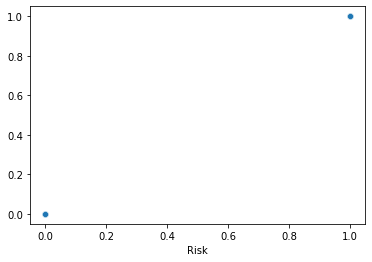

In [59]:
sns.scatterplot(y_test, y_pred)

In [ ]:
credit_risk_df.corr()

,Age,Job,Credit amount,Duration,Risk
Age,1.000000,0.015673,0.032716,-0.036136,NaN
Job,0.015673,1.000000,0.285385,0.210910,NaN
Credit amount,0.032716,0.285385,1.000000,0.624984,NaN
Duration,-0.036136,0.210910,0.624984,1.000000,NaN
Risk,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

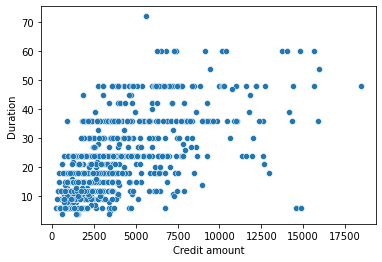

In [ ]:
sns.scatterplot(x=credit_risk_df['Credit amount'], y=credit_risk_df['Duration'], data=credit_risk_df)

Text(0, 0.5, 'Credit amount (in $)')

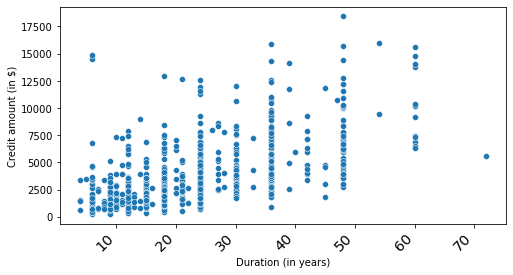

In [ ]:
plt.figure(figsize=(8,4))

sns.scatterplot(x=credit_risk_df['Duration'], y=credit_risk_df['Credit amount'], data=credit_risk_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('Duration (in years)')
plt.ylabel('Credit amount (in $)')

In [ ]:
credit_risk_df.groupby('Checking account').mean()

,Age,Job,Credit amount,Duration,Risk
Checking account,,,,,
little,35.339416,1.875912,3175.218978,21.339416,0.0
moderate,34.081784,1.899628,3827.561338,22.680297,0.0
rich,37.190476,1.777778,2177.650794,17.349206,0.0
